In [ ]:
!pip install pandas numpy seaborn matplotlib scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose train.csv and test.csv


Saving test.csv to test (1).csv
Saving train.csv to train (3).csv


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Fill missing Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing Fare in test set
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Fill missing Embarked with most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Convert categorical columns
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])

train_df['Embarked'] = LabelEncoder().fit_transform(train_df['Embarked'])
test_df['Embarked'] = LabelEncoder().fit_transform(test_df['Embarked'])


<ipython-input-13-8ed07e06967d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-13-8ed07e06967d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))


Validation Accuracy: 0.8100558659217877


In [ ]:
X_test = test_df[features]
predictions = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)
files.download('submission.csv')  # Download result


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age & Survival by Gender')

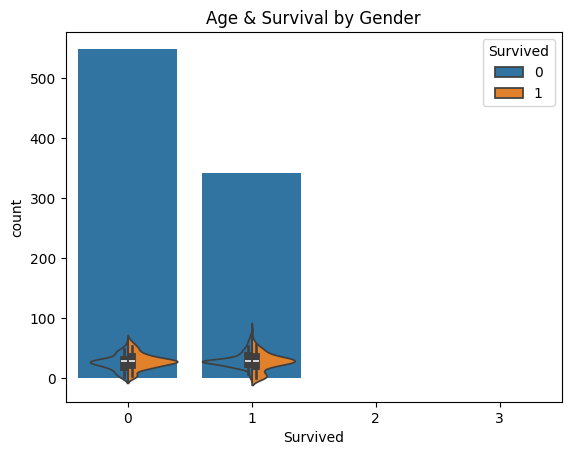

In [ ]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Class')

sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True)
plt.title('Age & Survival by Gender')
